In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("ds_salaries.csv") 

In [3]:
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
#unique values in the df columns.
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index=["unique count"]).T   

,unique count
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [8]:
#describe basic statistics of data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [8]:
#missing values control
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [10]:
#Making the experience_level column more readable
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Executive-Level')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid/Intermediate-Level')

In [11]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [12]:
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contract')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')

In [13]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [14]:
df['company_size']= df['company_size'].replace('L', 'Large')
df['company_size']= df['company_size'].replace('S', 'Small')
df['company_size']= df['company_size'].replace('M', 'Medium')

In [15]:
#Categorical Feature Analysis

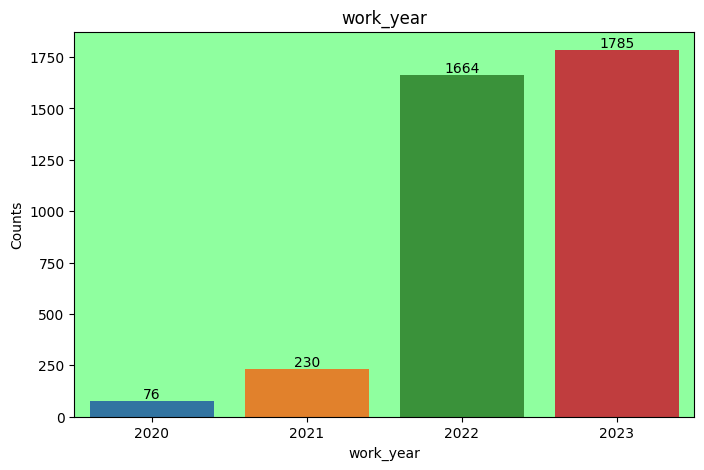

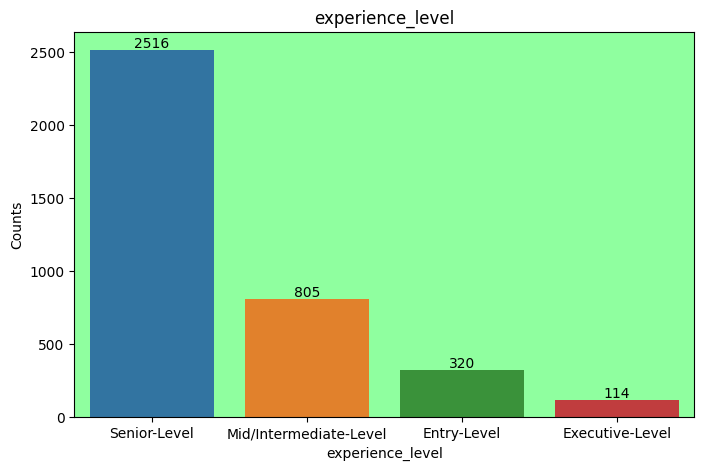

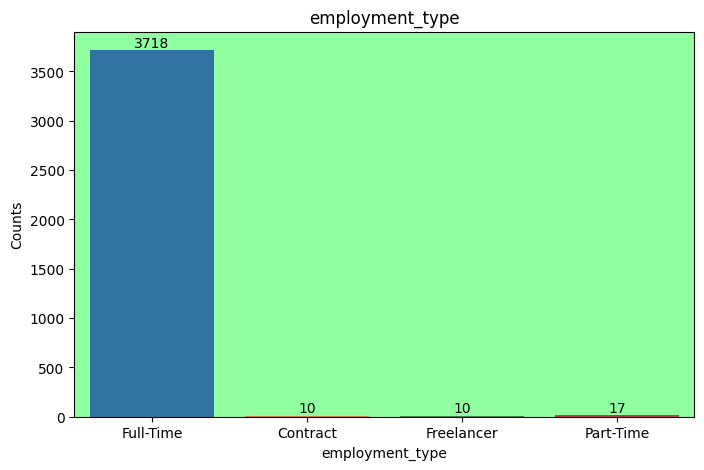

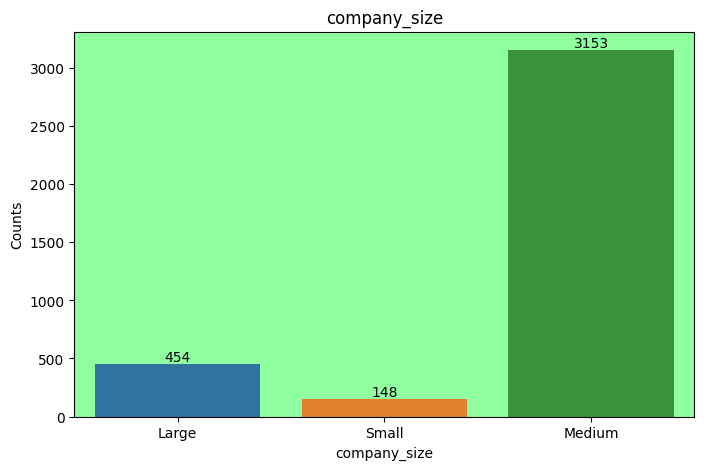

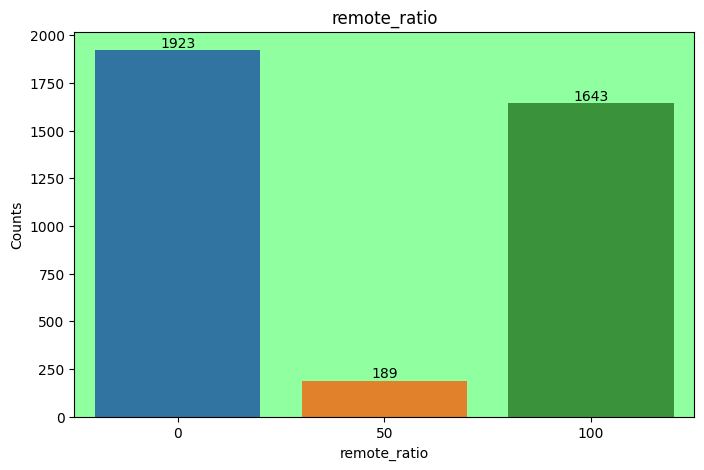

In [16]:
for i in ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']:
    fig, ax= plt.subplots(facecolor = "white", figsize =(8,5))
    sns.countplot(ax=ax, data = df, x= df[i])
    ax.set(ylabel='Counts', title=i)
    ax.set_facecolor("xkcd:mint green")
    
    ax.bar_label(ax.containers[0])
    
    

In [17]:
#Top 10 Jobs By Year Status

In [18]:
#number of unique jobs
df['job_title'].nunique()

93

In [19]:
df['job_title'].value_counts().nlargest(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

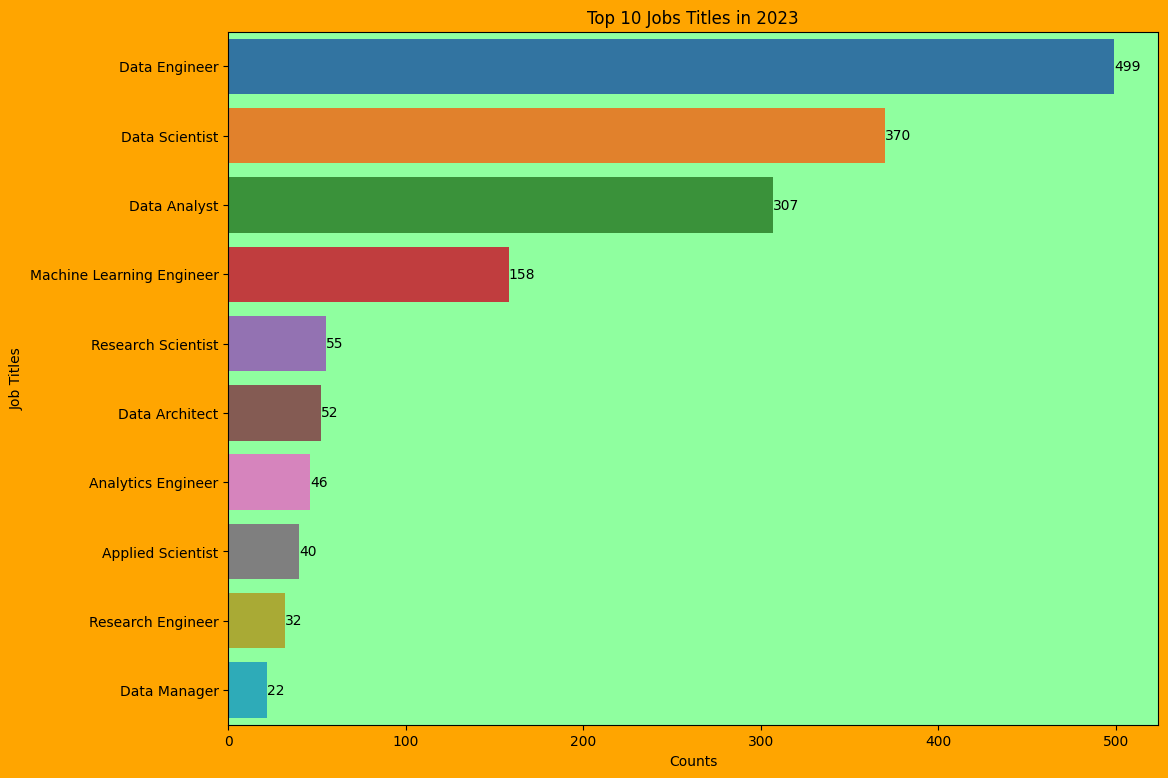

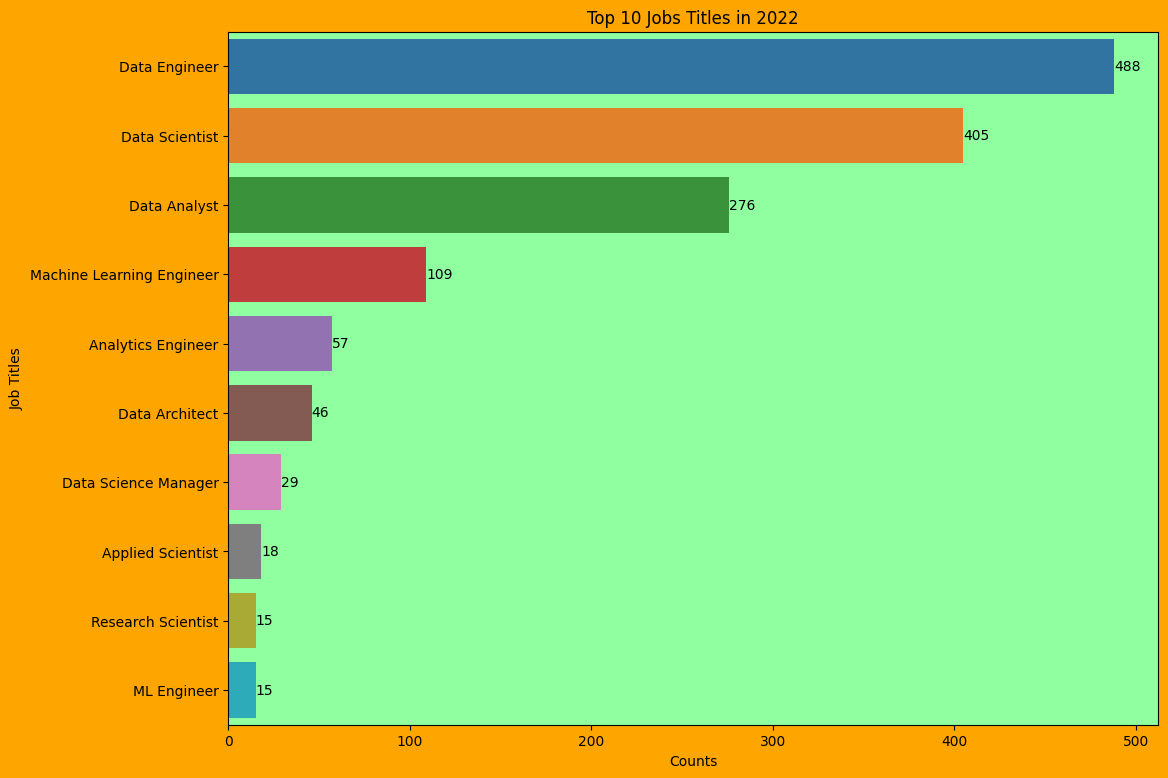

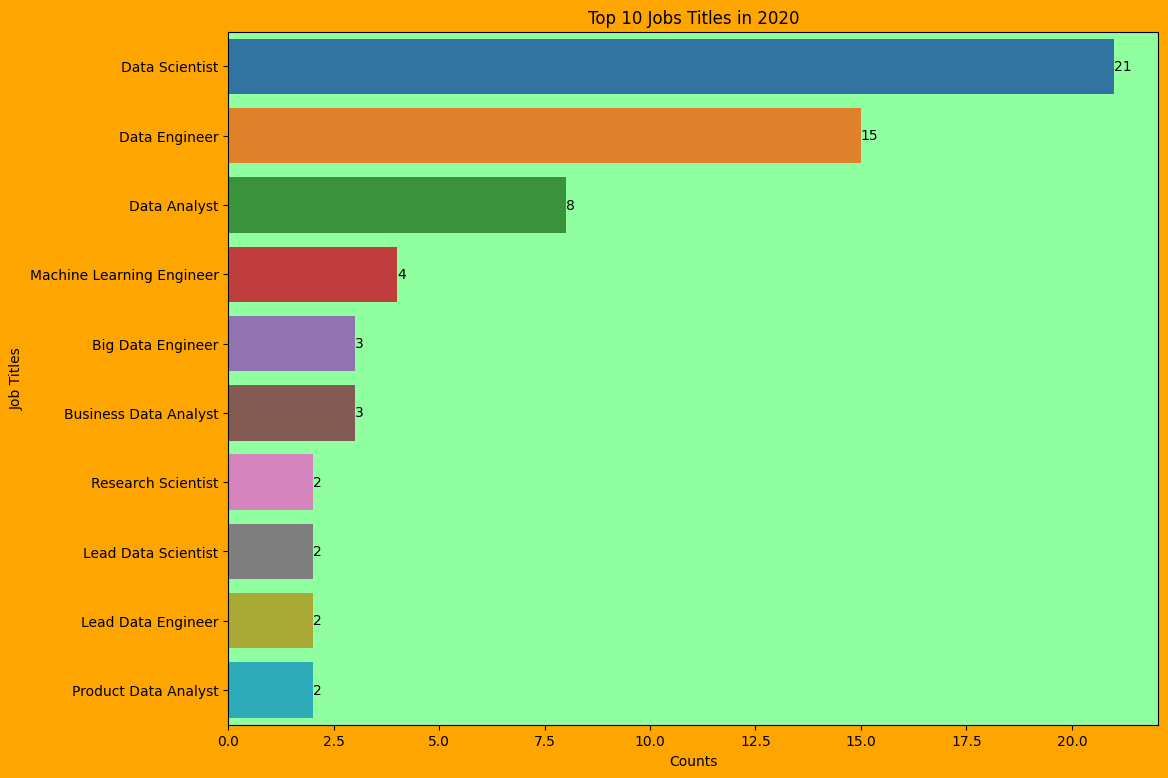

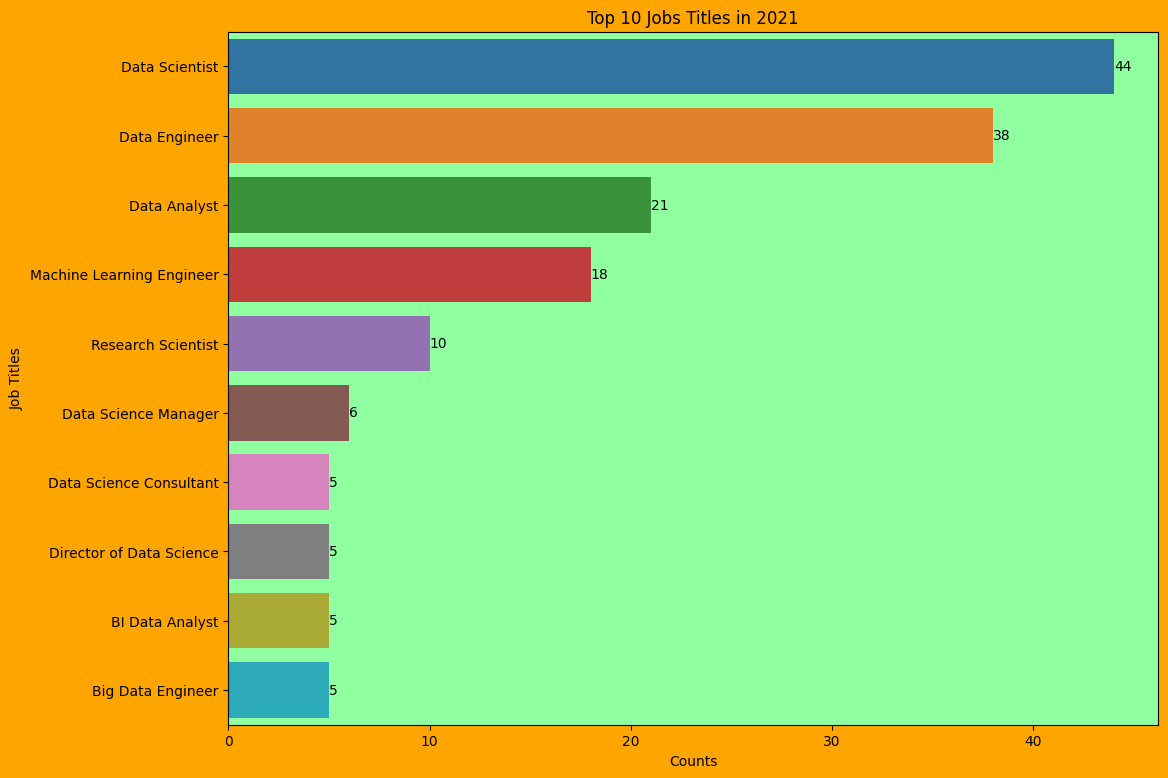

In [20]:
#in categorical:
for i in df["work_year"].unique():
    plt.figure(facecolor="orange",figsize=(12,9))
    ax= sns.barplot(y= df[df['work_year']==i]['job_title'].value_counts().nlargest(10).index,
                   x=df[df['work_year']==i]['job_title'].value_counts().nlargest(10))
    ax.set(ylabel='Job Titles', xlabel='Counts', title = f'Top 10 Jobs Titles in {i}')
    ax.set_facecolor("xkcd:mint green")
    ax.bar_label(ax.containers[0])
    plt.show()

In [21]:
#Number of Employment Types by Level of Experience

<function matplotlib.pyplot.show(close=None, block=None)>

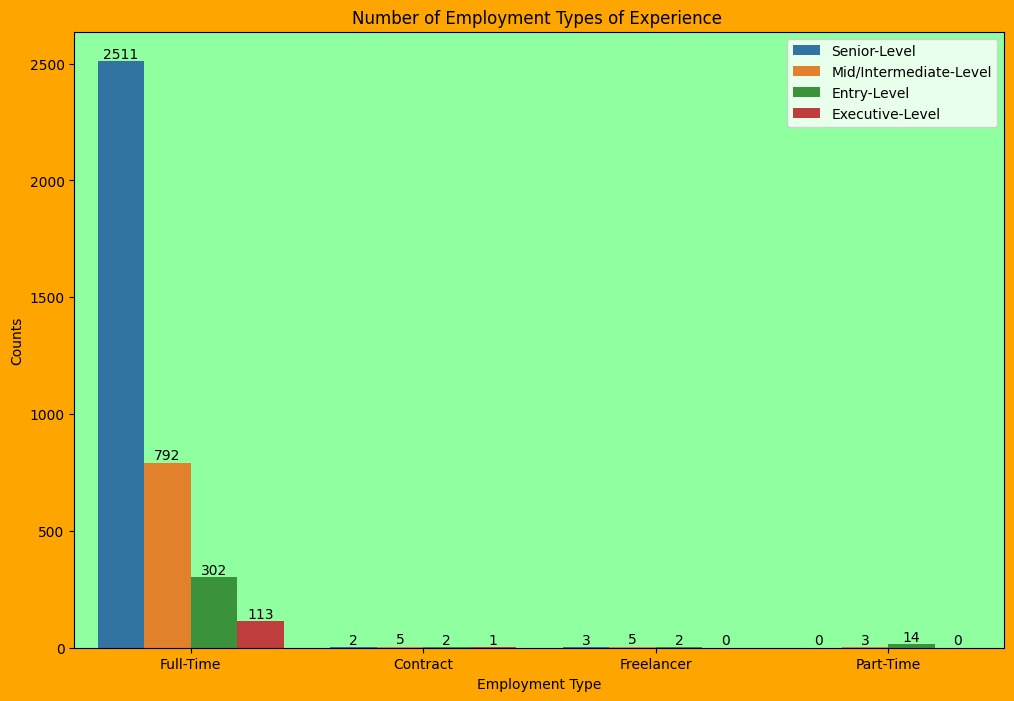

In [26]:
plt.figure(facecolor="orange",figsize=(12,8))
ax = sns.countplot(data = df, x ="employment_type" , hue= 'experience_level')
ax.set(xlabel="Employment Type", ylabel="Counts", title="Number of Employment Types of Experience ")
ax.set_facecolor("xkcd:mint green")
plt.legend(loc=1)
for j in [0,1,2,3]:
    ax.bar_label(ax.containers[j])
plt.show

In [27]:
#Distribution of salary by company location

In [28]:
df['company_location'].nunique()

72

In [30]:
df['company_location'].value_counts().nlargest(10)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: company_location, dtype: int64

In [34]:
top_company=df['company_location'].value_counts().nlargest(5).index.tolist()
top_company

['US', 'GB', 'CA', 'ES', 'IN']

In [35]:
df_top_company = df[df['company_location'].isin(top_company)]
df_top_company.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-Level,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid/Intermediate-Level,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid/Intermediate-Level,Contract,ML Engineer,25500,USD,25500,US,100,US,Small


<function matplotlib.pyplot.show(close=None, block=None)>

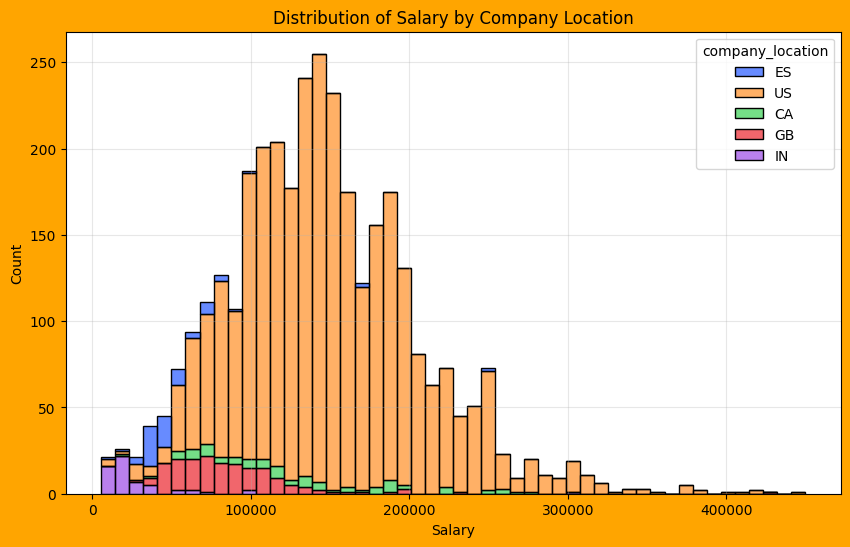

In [38]:
plt.figure(facecolor='orange', figsize=(10,6))
sns.histplot(x='salary_in_usd', hue='company_location', multiple='stack', alpha= 0.6, bins = 50, data = df_top_company, palette = 'bright' )
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary by Company Location')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show

In [39]:
#Average Salary By Company Size

In [47]:
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
company_size_salary

,company_size,salary_in_usd
0,Medium,143131.0
1,Large,118301.0
2,Small,78227.0


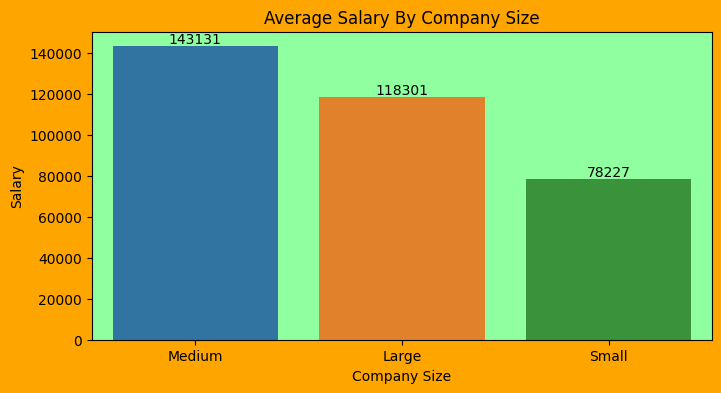

In [48]:
plt.figure(facecolor = 'orange', figsize = (8,4))
ax=sns.barplot(data= company_size_salary, x= "company_size", y= "salary_in_usd")
ax.set(ylabel="Salary", xlabel='Company Size', title = 'Average Salary By Company Size')
ax.set_facecolor('xkcd:mint green')
ax.bar_label(ax.containers[0])
plt.show()

In [49]:
#Average Salary By Remote Ratio 

In [52]:
remote_ratio_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().round(0).nlargest(15).sort_values(ascending=False).reset_index()
remote_ratio_salary

,remote_ratio,salary_in_usd
0,0,144316.0
1,100,136481.0
2,50,78401.0


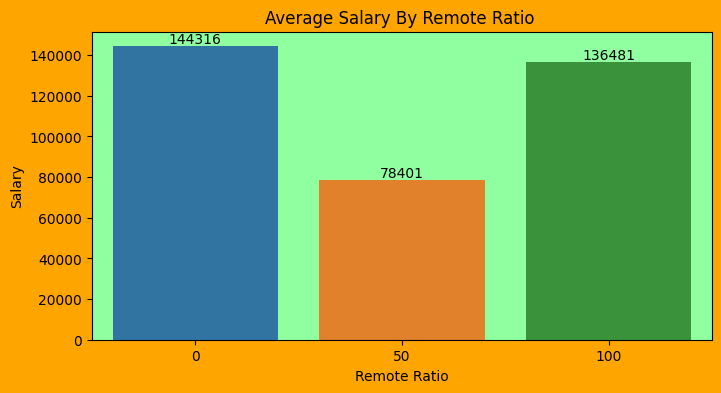

In [53]:
plt.figure(facecolor = 'orange', figsize = (8,4))
ax=sns.barplot(data= remote_ratio_salary, x= "remote_ratio", y= "salary_in_usd")
ax.set(ylabel="Salary", xlabel='Remote Ratio', title = 'Average Salary By Remote Ratio ')
ax.set_facecolor('xkcd:mint green')
ax.bar_label(ax.containers[0])
plt.show()

In [54]:
#Average Salary By Employment Type

In [55]:
employment_type_salary = df.groupby('employment_type')['salary_in_usd'].mean().round(0).nlargest(15).sort_values(ascending=False).reset_index()
employment_type_salary

,employment_type,salary_in_usd
0,Full-Time,138314.0
1,Contract,113447.0
2,Freelancer,51808.0
3,Part-Time,39534.0


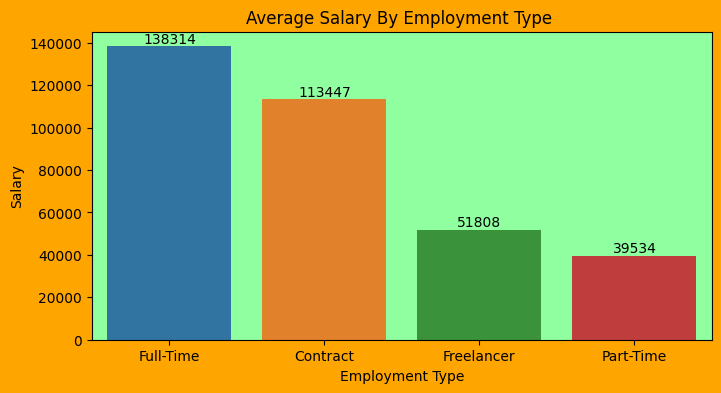

In [61]:
plt.figure(facecolor = 'orange', figsize = (8,4))
ax=sns.barplot(data= employment_type_salary , x= "employment_type", y= "salary_in_usd")
ax.set(ylabel="Salary", xlabel='Employment Type', title = 'Average Salary By Employment Type ')
ax.set_facecolor('xkcd:mint green')
ax.bar_label(ax.containers[0])
plt.show()

In [62]:
#average salary by experience level

In [63]:
experience_level_salary=df.groupby('experience_level')['salary_in_usd'].mean().round(0).nlargest(15).sort_values(ascending= False).reset_index()
experience_level_salary

,experience_level,salary_in_usd
0,Executive-Level,194931.0
1,Senior-Level,153051.0
2,Mid/Intermediate-Level,104526.0
3,Entry-Level,78546.0


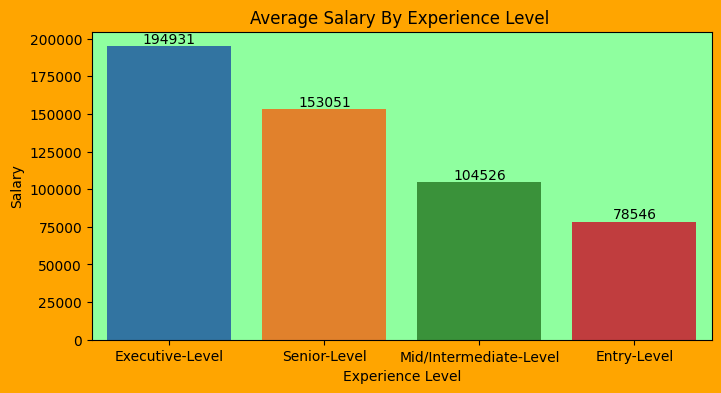

In [64]:
plt.figure(facecolor = 'orange', figsize = (8,4))
ax=sns.barplot(data= experience_level_salary , x= "experience_level", y= "salary_in_usd")
ax.set(ylabel="Salary", xlabel='Experience Level', title = 'Average Salary By Experience Level ')
ax.set_facecolor('xkcd:mint green')
ax.bar_label(ax.containers[0])
plt.show()

In [65]:
#Average salaries in dollars per year by type of employment 

In [66]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending=False).reset_index()
avg_salaries

,employment_type,salary_in_usd
0,Full-Time,138314.0
1,Contract,113447.0
2,Freelancer,51808.0
3,Part-Time,39534.0


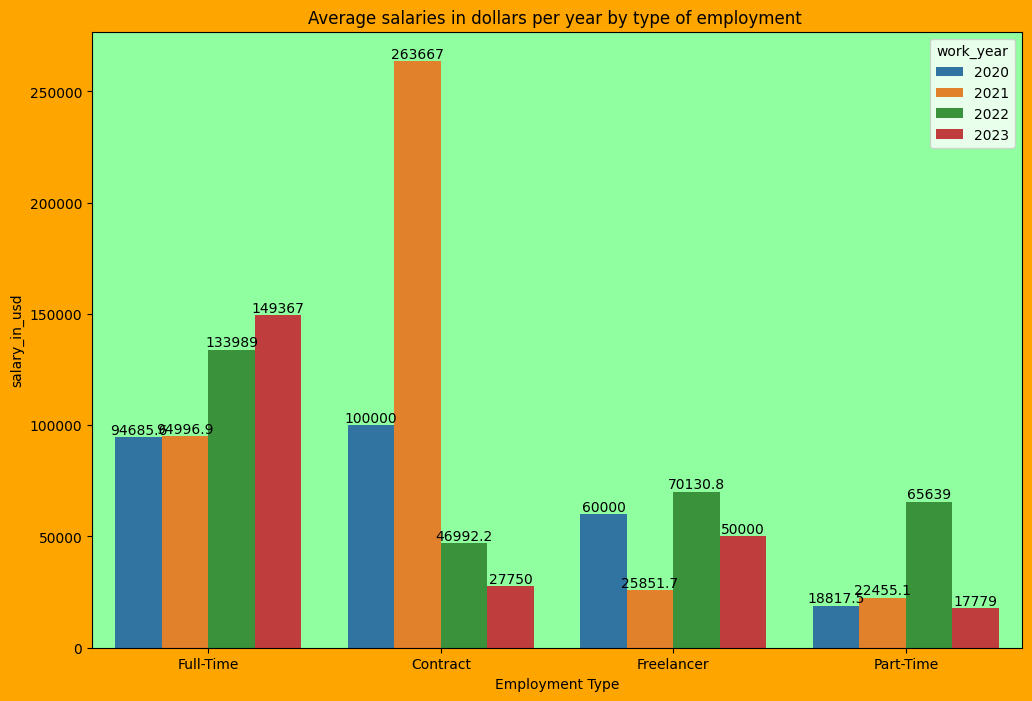

In [69]:
plt.figure(facecolor = "orange", figsize=(12,8))
ax=sns.barplot(data= df, x= 'employment_type', y='salary_in_usd', hue='work_year', errorbar= None)
ax.set(xlabel='Employment Type', label='Dollars', title="Average salaries in dollars per year by type of employment ")
ax.set_facecolor("xkcd:mint green")

for j in [0,1,2,3]:
    ax.bar_label(ax.containers[j])
plt.show()   

In [70]:
#top 15 average salaries by job titles

In [71]:
job_title_salary =df.groupby('job_title')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index().head(15)
job_title_salary

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.0
1,Cloud Data Architect,250000.0
2,Data Lead,212500.0
3,Data Analytics Lead,211254.0
4,Principal Data Scientist,198171.0
5,Director of Data Science,195141.0
6,Principal Data Engineer,192500.0
7,Machine Learning Software Engineer,192420.0
8,Data Science Manager,191279.0
9,Applied Scientist,190264.0


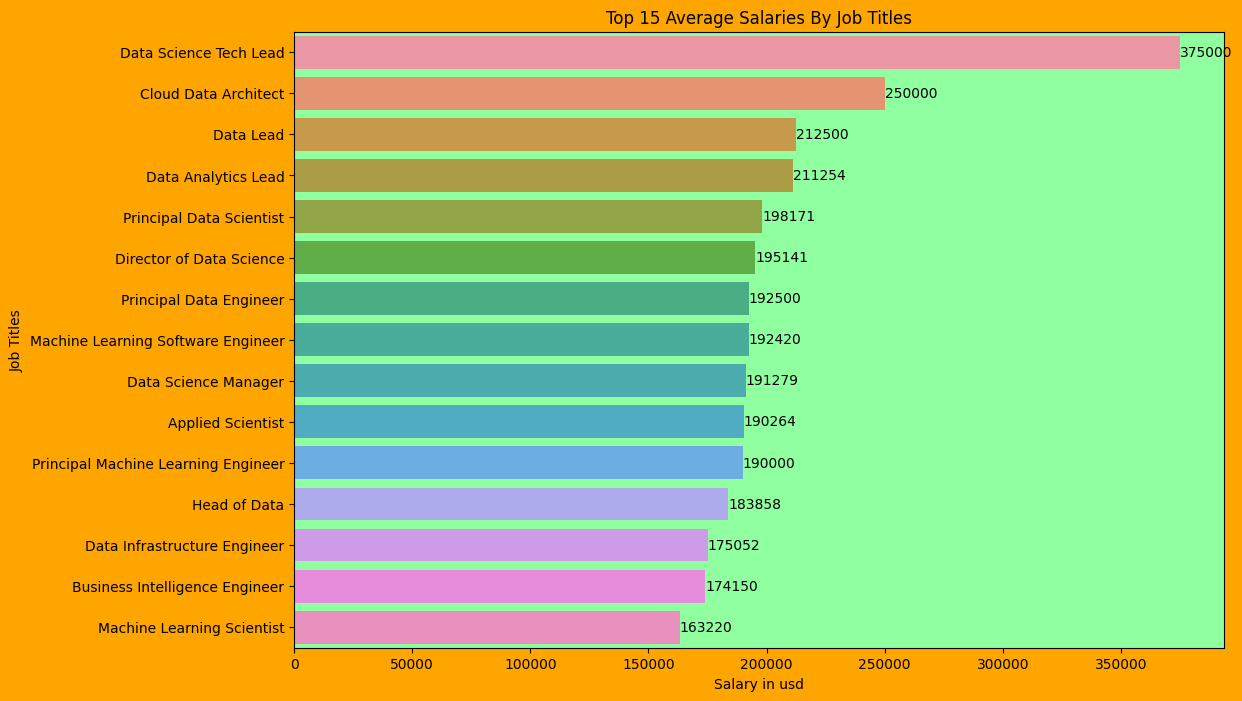

In [74]:
plt.figure(facecolor="orange", figsize=(12,8))
ax = sns.barplot(data = job_title_salary, y='job_title', x= 'salary_in_usd')
ax.set(ylabel='Job Titles', xlabel='Salary in usd', title='Top 15 Average Salaries By Job Titles')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])
plt.show()

In [75]:
#Average Salaries in Dollars Per Year

<function matplotlib.pyplot.show(close=None, block=None)>

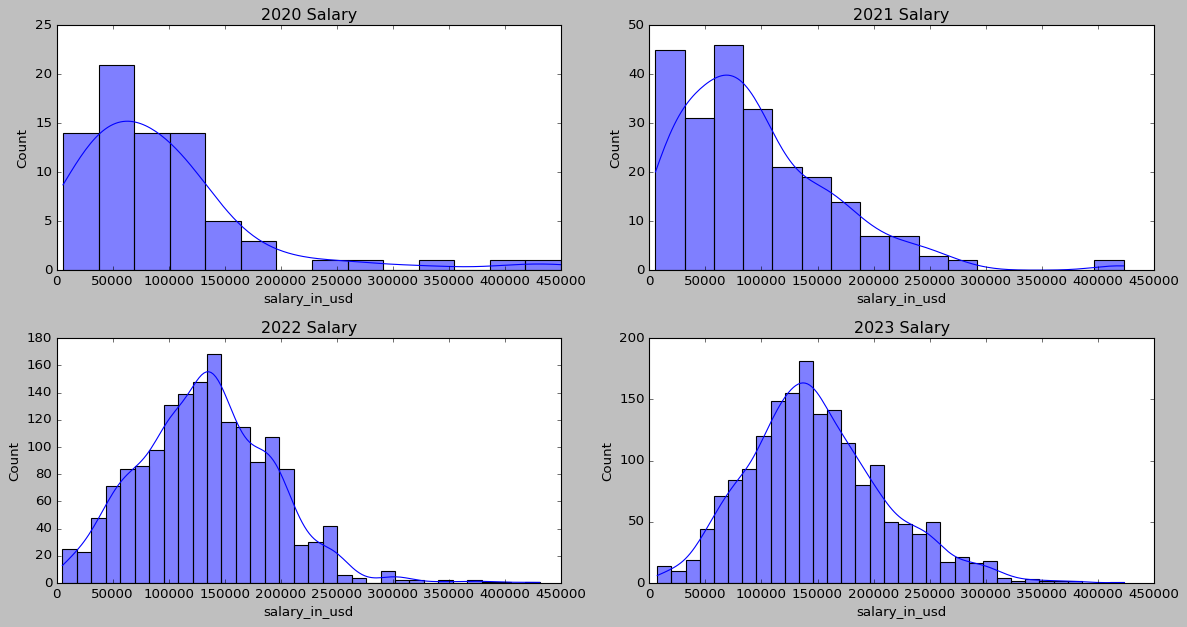

In [78]:
plt.style.use('classic')
plt.figure(figsize = (15, 8))
plt.subplot(221)
sns.histplot(data=df, x= df[df['work_year']==2020]['salary_in_usd'],kde=True)
plt.title("2020 Salary")
plt.subplot(222)
sns.histplot(data=df, x= df[df['work_year']==2021]['salary_in_usd'],kde=True)
plt.title("2021 Salary")
plt.subplot(223)
sns.histplot(data=df, x= df[df['work_year']==2022]['salary_in_usd'],kde=True)
plt.title("2022 Salary")
plt.subplot(224)
sns.histplot(data=df, x= df[df['work_year']==2023]['salary_in_usd'],kde=True)
plt.title("2023 Salary")
plt.tight_layout();
plt.show





In [79]:
year_based_salary = df.groupby('work_year')['salary_in_usd'].mean()
year_based_salary

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

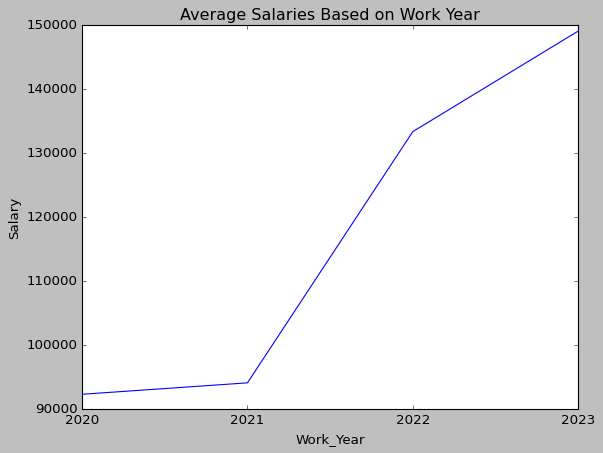

In [80]:
sns.lineplot(x=['2020','2021','2022','2023'], y=year_based_salary)
plt.title("Average Salaries Based on Work Year")
plt.xlabel('Work_Year')
plt.ylabel('Salary')
plt.show()